# IMAGE CAPTIONING

##Combine computer vision and natural language processing to build an image captioning AI. Use pre-trained image recognition models like VGG or ResNet to extract features from images, and then use a recurrent neural network (RNN) or transformer-based model to generate captions for those images.

In [ ]:
!pip install transformers

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
#nlpconnect/vit-gpt2-image-captioning


In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
max_length =16
num_beams = 4

gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

In [ ]:


max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

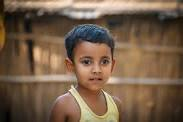

In [ ]:
# Import the necessary libraries
import IPython.display as display

# Get the image path
image_path = "/content/download.jpg"

# Create the image tag
image_tag = display.Image(image_path)

# Display the image
display.display(image_tag)

In [ ]:
predict_step(['download.jpg'])

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a young girl standing in front of a wooden fence']

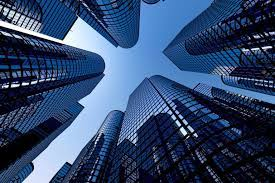

In [ ]:
# Import the necessary libraries
import IPython.display as display

# Get the image path
image_path = "/content/b.jpg"

# Create the image tag
image_tag = display.Image(image_path)

# Display the image
display.display(image_tag)

In [ ]:
predict_step(['b.jpg'])

['a very tall building with many windows']

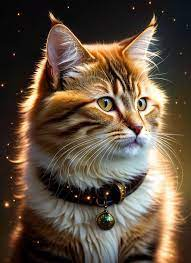

In [ ]:
# Import the necessary libraries
import IPython.display as display

# Get the image path
image_path = "/content/c.jpg"

# Create the image tag
image_tag = display.Image(image_path)

# Display the image
display.display(image_tag)

In [ ]:
predict_step(['c.jpg'])

['a cat that is looking at the camera']

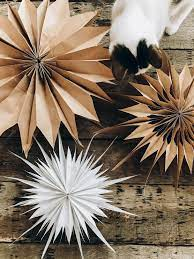

In [ ]:
# Import the necessary libraries
import IPython.display as display

# Get the image path
image_path = "/content/h.jpg"

# Create the image tag
image_tag = display.Image(image_path)

# Display the image
display.display(image_tag)

In [ ]:
predict_step(['h.jpg'])

['a cat sitting on top of a wall next to an umbrella']